# Corso di Probabilità e Statistica - Distribuzione di Poisson 

In questo capitolo introduciamo la distribuzione di Poisson 
Osservazione: questo notebook è impostato come la spiegazione di Andreazza sulla distribuzione di Poisson per il decadimento delle particelle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns # Grafica avanzata
import warnings
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

**Processo di Poisson**

In [2]:
lamda = 20.  # numero medio di eventi per unità di tempo

**NB:** non si può chiamare una variabile lambda perchè altrimenti viene interpretata come una lambda function

In [3]:
dt = .001  # passo temporale
n = int(1./dt)  # numero di passi (utilizzo un "segmento temporale di una unità")

In [4]:
x = np.zeros(n) #inizializzazione =0 -> vettore di n zeri
x[np.random.rand(n) <= lamda * dt] = 1 #mettiamo 1 con probabilità: lamba*dt
#print(x)

Il pezzettino di codice che segue fa esattamente la stessa cosa solo che volevo essere sicura di quello che stavo facendo.

In [5]:
for i in range(n):
    if(np.random.rand() <= lamda*dt):
        x[i] = 1

#print(x)

Faccio esattamente quello che ho fatto prima ma scritto in maniera diversa: a ciascuno degli n istanti attribuisco un valore di evento (1) o non evento (0).

Ovviamente la probababilità che in ciascuno degli n intervalli di tempo dt avvenga effettivamente un evento (cioè che a quell'intervallo fondamentale di tempo venga attribuito il valore 1, è pari a $\lambda dt$ ovvero esattamente quella ipotizzata all'inizio.

In [6]:
k=int(np.sum(x)) #numero di eventi nell'intervallo di tempo "totale"
#il metodo sum di numpy mi consente di sommare tutti gli eleemnti di un vettore
print(k)

36


**Statistica del processo di Poisson**

In pratica in questa fase costruisco la dinamica del processo di Poisson.

In [7]:
lamda=20 # numero medio di eventi per unità di tempo
dt = .001  # passo temporale
n = int(1. / dt)  # numero di passi 
NR=1000 #numero di realizzazioni del processo

Definisco tutti i parametri del processo di Poisson che voglio realizzare, in particolare il valore medio, la larghezza dell'intervallo di tempo fondamentale, il numero n di intervallini in cui è diviso l'inyervallo originario e il numero di repliche dell'esperimento.

In [8]:
Pd=np.zeros(n+1) #inizializzazione della distribuzione

Creo il vettore Pd della distribuzione di Poisson, vettore di n+1 zeri

In [9]:
for i in range(NR): #loop sulle realizzazioni
    x = np.zeros(n) #inizializzazione a 0 del parametro EVENTO
    x[np.random.rand(n) <= lamda * dt] = 1 #mettiamo 1 con probabilità: lamba*dt
    k=int(np.sum(x)) #numero di eventi nell'intervallo di tempo
    Pd[k]=Pd[k]+1 #aggiorniamo la distribuzione

Pd=Pd/NR #normalizzazione

Ripeto gli step precedentemente studiati singolarmente

In [10]:
# calcoliamo media e varianza
mu=np.average(np.arange(n+1),weights=Pd)
print("media empirica = ", mu)
print("media teorica =", lamda)

sigma2=np.average(np.arange(n+1)**2,weights=Pd)-mu**2
print("varianza empirica =", sigma2)
print("varianza teorica = ", lamda)

media empirica =  20.028
media teorica = 20
varianza empirica = 19.963216000000045
varianza teorica =  20


Si può notare la vicinanza dei valori empirici a quelli teorici, la piccola discrepanza è sicuramente imputabile al fatto che il numero di repliche non sia così alto.

**Grafici**

In [12]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 14})
sns.set_theme()

In [13]:
Pd1=stats.poisson(lamda) #distribuzione di Poisson

[0. 0. 0. ... 0. 0. 0.]


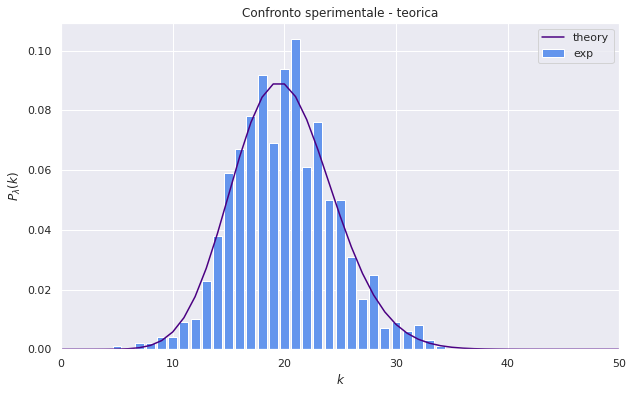

<Figure size 576x360 with 0 Axes>

In [14]:
k = np.arange(n+1)

plt.plot(k, Pd1.pmf(k), label="theory", color="indigo") #linea
plt.bar(k, Pd, color='cornflowerblue', label="exp") #pseudo istogramma

plt.xlim(0,50)
plt.xlabel(r'$k$') 
plt.ylabel(r'$P_\lambda(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()
plt.title('Confronto sperimentale - teorica')
plt.figure(figsize=(8,5))
plt.show()